In [64]:
# I again had problems with plotting string data. I am guessing I need to convert strings to a number array to get around it

import pandas
%matplotlib inline
import matplotlib.pyplot
import pandas
import sklearn.decomposition
import numpy
import sklearn.tree

In [57]:
kag_frame = pandas.read_csv('train.csv.gz')

In [58]:
kag_frame

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


In [59]:
kag_frame.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A705677,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [61]:
dogs = kag_frame[kag_frame.AnimalType == 'Dog']
cats = kag_frame[kag_frame.AnimalType == 'Cat']
Adopt = kag_frame[kag_frame.OutcomeType == 'Adoption']
Euth = kag_frame[kag_frame.OutcomeType == 'Euthanasia']
Return = kag_frame[kag_frame.OutcomeType == 'Return_to_owner']
Died = kag_frame[kag_frame.OutcomeType == 'Died']


In [10]:
cats

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
10,A668402,NaN,2013-12-05 15:50:00,Transfer,SCRP,Cat,Unknown,2 years,Domestic Shorthair Mix,Black
15,A678825,Oliver,2014-07-12 12:10:00,Adoption,Foster,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Orange Tabby/White
16,A678050,NaN,2014-05-03 16:15:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Brown Tabby
18,A679010,Chrissy,2014-05-17 11:32:00,Transfer,Partner,Cat,Intact Female,2 years,Angora Mix,White
21,A708812,Munchkin,2015-09-18 15:19:00,Transfer,Partner,Cat,Spayed Female,1 year,Domestic Shorthair Mix,White
25,A712750,Olive,2015-10-03 15:44:00,Transfer,Partner,Cat,Intact Female,1 month,Domestic Shorthair Mix,Orange Tabby


In [42]:
Euth.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,1555,740,1555,1555,1554,1555,1555,1553,1555,1555
unique,1555,569,1526,1,6,2,5,39,198,137
top,A689624,Rocky,2016-01-03 09:37:00,Euthanasia,Suffering,Dog,Intact Male,2 years,Domestic Shorthair Mix,Black/White
freq,1,11,3,1555,1002,845,477,275,535,160


In [14]:
Return.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,4786,4633,4786,4786,0.0,4786,4785,4786,4786,4786
unique,4786,2306,4636,1,0.0,2,5,35,639,212
top,A664225,Bella,2014-12-27 11:09:00,Return_to_owner,NaN,Dog,Neutered Male,2 years,Pit Bull Mix,Black/White
freq,1,49,7,4786,NaN,4286,2247,917,598,474


In [16]:
Adopt.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,10769,9091,10769,10769,1966,10769,10769,10769,10769,10769
unique,10769,3889,10453,1,3,2,4,28,920,260
top,A686254,Max,2014-03-08 17:42:00,Adoption,Foster,Dog,Neutered Male,2 months,Domestic Shorthair Mix,Black/White
freq,1,59,4,10769,1800,6497,5222,2636,3273,1183


In [51]:
Transfer.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,9422,4497,9422,9422,9416,9422,9422,9406,9422,9422
unique,9422,2526,6437,1,3,2,5,41,623,241
top,A705677,X,2015-08-11 00:00:00,Transfer,Partner,Cat,Intact Female,1 year,Domestic Shorthair Mix,Black/White
freq,1,24,19,9422,7816,5505,2550,1417,4538,980


In [62]:
Died.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,197,77,197,197,181,197,197,197,197,197
unique,197,74,193,1,5,2,5,31,35,48
top,A683066,Hawk,2015-07-11 09:51:00,Died,In Kennel,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White
freq,1,2,2,197,114,147,79,48,112,27


In [26]:
kag_frame['AnimalType'] = kag_frame.AnimalType.map({'Dog':0, 'Cat': 1})


In [27]:
species = kag_frame[kag_frame.AnimalType.notnull()]
DogCat = species[['AnimalType']]


In [85]:
#kag_frame_clean = kag_frame[pandas.notnull(kag_frame['AnimalType'])]
#cleaned_outcome = kag_frame_clean[pandas.notnull(kag_frame_clean['OutcomeType'])]
#Thies doesn't appear to actualy remove the null values

In [28]:
regressor = sklearn.linear_model.LogisticRegression()

In [29]:
regressor.fit(DogCat, species.OutcomeType)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
regressor.predict_proba([[0]])
#adopt, Died, euthanised, transferred, Returned

array([[ 0.41632568,  0.00364577,  0.05433912,  0.27456194,  0.2511275 ]])

In [33]:
regressor.predict_proba([[1]])

array([[ 0.38371265,  0.01308757,  0.06375514,  0.04509613,  0.49434851]])

In [92]:
X = kag_frame[['AnimalType']]
regressor.fit(X, kag_frame.OutcomeType)

ValueError: could not convert string to float: Cat

In [37]:
Predicted_Outcome = regressor.predict(X)
Predicted_Outcome

array(['Adoption', 'Transfer', 'Adoption', ..., 'Adoption', 'Transfer',
       'Transfer'], dtype=object)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

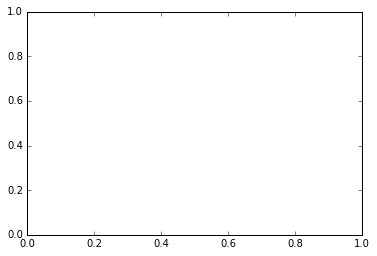

In [96]:
#trying to map animal type to predicted outcome
matplotlib.pyplot.hist(kag_frame.AnimalType, kag_frame.OutcomeType)

In [82]:
X = kag_frame.OutcomeType[['Transfer','Died', 'Euthanasia', 'Return_to_owner', 'Adoption']]
y = kag_frame.AnimalType

In [83]:
regressor = sklearn.tree.DecisionTreeRegressor(max_depth = 2)

In [84]:
regressor.fit(X,y)

/Users/ngaireoleary/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [88]:
import sklearn.tree

In [89]:
classifier = sklearn.tree.DecisionTreeClassifier(criterion='gini')

In [90]:
x = kag_frame[['AnimalType']]
y = kag_frame[['OutcomeType']]

In [91]:
classifier.fit(x, y)

ValueError: could not convert string to float: Cat